In [1]:
!pip list

Package             Version
------------------- -------
argon2-cffi         20.1.0
async-generator     1.10
attrs               20.3.0
backcall            0.2.0
bleach              3.3.0
cffi                1.14.5
colorama            0.4.4
cycler              0.10.0
decorator           4.4.2
defusedxml          0.7.1
entrypoints         0.3
importlib-metadata  3.10.0
ipykernel           5.5.3
ipython             7.22.0
ipython-genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
Jinja2              2.11.3
joblib              1.0.1
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.12
jupyter-console     6.4.0
jupyter-core        4.7.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
kiwisolver          1.3.1
MarkupSafe          1.1.1
matplotlib          3.4.1
mistune             0.8.4
nbclient            0.5.3
nbconvert           6.0.7
nbformat            5.1.2
nest-asyncio        1.5.1
notebook            6.3.0
numpy               1.20.2
p

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# we just put csv in the same folder
df_train = pd.read_csv('data/train.csv')

In [30]:
df_train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


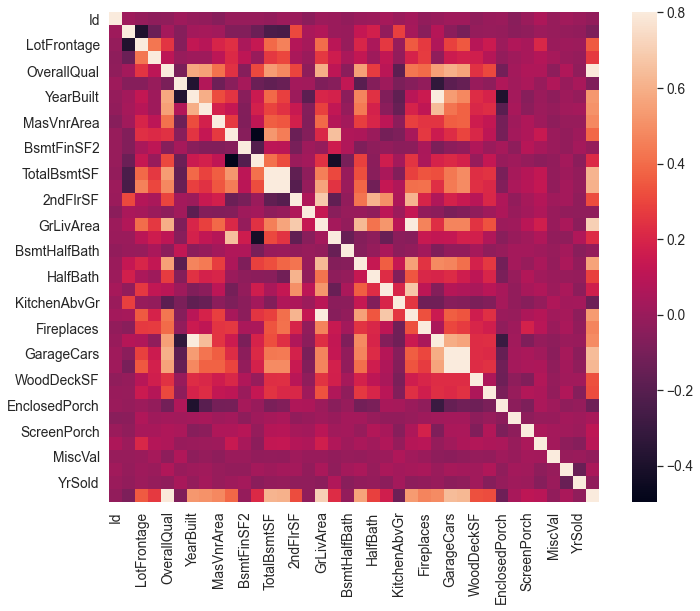

In [31]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

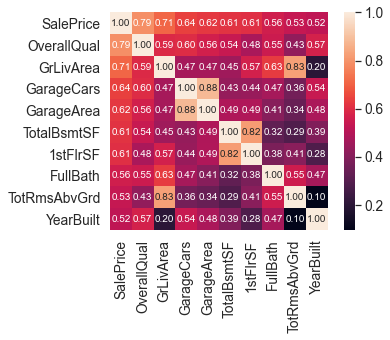

In [32]:

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,                        # col val
                 cbar=True,                 # cbar: color bar  
                 annot=True, square=True,   # annot: annotation
                 fmt='.2f',                 # anotation format, fmt
                 annot_kws={'size': 10},    # anoo size
                 yticklabels=cols.values,   # y val
                 xticklabels=cols.values)   # v val
plt.show()

In [33]:
# missing data
# get is null and sum them all and then sort with ascending
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [34]:
#dealing with missing data

# drop missing variable if the total number > 1
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)

# drop Electrical missing observation, just one data point
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

#just checking that there's no missing data missing...
# no null data
df_train.isnull().sum().max() 

0

In [35]:
df_train.tail(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,9000,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,9,2009,WD,Normal,136000
1451,1452,20,RL,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,New,Partial,287090
1452,1453,180,RM,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,145000
1453,1454,20,RL,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [43]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)

print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [48]:
df_train['SalePrice'][:,np.newaxis]

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


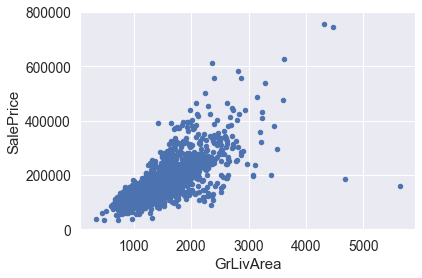

In [49]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [50]:
# deleting points

# 排序後獲取兩個點的ID然後drop掉。
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


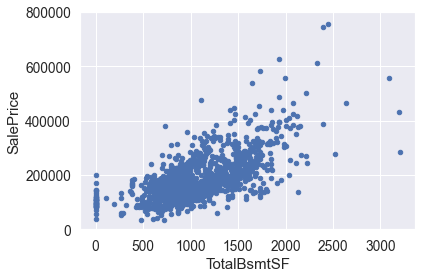

In [51]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

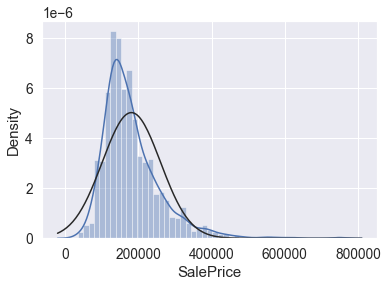

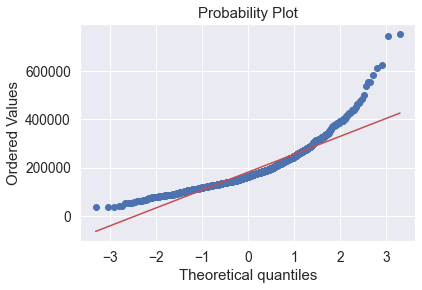

In [52]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

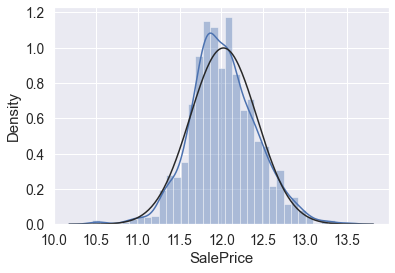

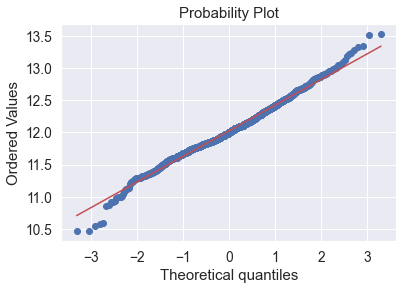

In [53]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

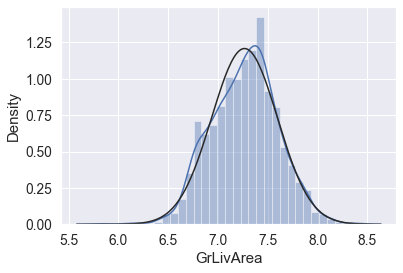

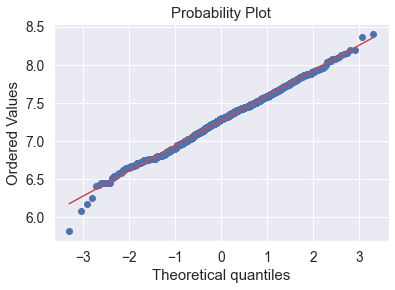

In [55]:
#histogram and normal probability plot
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [56]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0

# create new var
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
# set all val as zero
df_train['HasBsmt'] = 0 
# if the val in TotalBsmtSF gt zero, then we set HasBsmt
df_train.loc[df_train['TotalBsmtSF'] > 0,'HasBsmt'] = 1


#transform data     排除 TotalBsmSF = 0 的 資料
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [58]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,1
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,11.870600,1
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,12.634603,1
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,350,11,2009,WD,Normal,12.206073,1
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2008,WD,Abnorml,11.774520,1
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2008,WD,Normal,11.678440,1


In [66]:
df_train.loc[df_train['HasBsmt'] != 1].head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
17,18,90,RL,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,500,10,2006,WD,Normal,11.407565,0
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2008,WD,AdjLand,11.314475,0
90,91,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2006,WD,Normal,11.607326,0
102,103,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,6,2009,WD,Alloca,11.686576,0
156,157,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,6,2006,WD,Normal,11.603680,0
182,183,20,RL,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,180,0,0,0,6,2007,WD,Normal,11.695247,0
259,260,20,RM,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,12,2008,WD,Normal,11.482466,0
342,343,90,RL,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,5,2006,WD,Normal,11.379394,0
362,363,85,RL,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,7,2009,ConLD,Normal,12.198544,0
371,372,50,RL,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2008,WD,Normal,11.808814,0


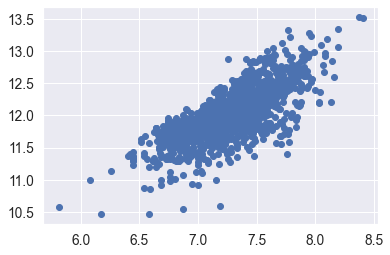

In [67]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

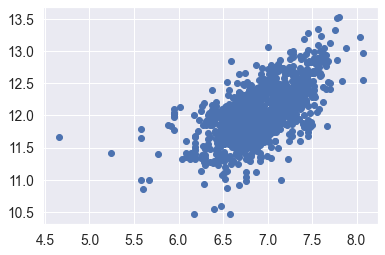

In [68]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);
